# MLE介紹與簡單的python實做
在上一次的影片中，我們知道我們可以給定連續報酬率的分配來做風險評估，讓我們更進一步來探討怎麼做吧
$$ln(\frac{P_t}{P_{t-1}}) \sim \text{some distribution}$$
這邊我們當然可以不假設分配而使用非參數估計分配，但我們由上一集圖形可以看出，常態分配可能也不是特別壞的選擇，當然，我們也可以假設一些厚尾的分配，可能更接近真實狀況，如果我們假設
$$ln(\frac{P_t}{P_{t-1}}) \sim N(\mu,\sigma^2)$$
那我們如何估計參數$\mu$以及$\sigma^2$?

## 什麼是MLE
在這邊，一個簡單的作法便是利用MLE(最大概似法)來估計我們的參數，最大概似法的想法很簡單，當我們得到一組樣本$s_1, \cdots s_n$後，我們想辦法找到參數使的出現這組樣本的機率最大，那這樣的參數便是我們想要的參數。為了更好理解這個概念，讓我們看看一個簡單的例子:
### 一個例子
假設妳的朋友拿出一個硬幣，說要跟妳賭一杯啤酒，但是妳擔心妳的朋友可能會作弊，所以想要檢查這個硬幣是不是一個公平的硬幣，但是她並沒有任何直接檢驗這個硬幣的方法，她只能藉由丟擲硬幣並觀察丟擲的結果來判斷這是不是一個公平硬幣。我們來想想這種情況下，她擁有哪些資訊？
- 首先，硬幣擲出來應該不是人頭面就是錢幣面，所以她可以假設投擲錢幣出現那一面的機率分配滿足一個Bernoulli(p)，所謂的Bernoulli(p)滿足下列的機率函數
$$f_X(x)= p^x(1-p)^{1-x} = \begin{cases} p,  & \text{if}\ x=1 \\
      1-p, & \text{if} \ x=0 \end{cases}$$
 這邊，我們假設x=1為人頭，x=0為錢幣。
- 再來，她可以觀察到一系列的投擲硬幣的結果，假設她自己投擲了硬幣n次，則我們可以觀察到$x_1,x_2,\cdots,x_n$個結果。
那我們怎麼利用這兩個資訊來判斷$p$到底等於多少，是不是$p=\frac{1}{2}$為一個公平的硬幣？

在這種情況下，我們可以使用MLE來估計我們的參數，我們的目標是要找到合適的$p$使得出現$x_1,x_2,\cdots,x_n$這組樣本的機率最大，這代表說，我們必須先計算出這組樣本的聯合機率分佈是長怎麼樣子。在這邊，我們假設每次抽樣是獨立的，也就是說，現在丟擲的硬幣的機率分佈不會被之前投擲的硬幣的結果所影響，則因為每一個硬幣都滿足Bernoulli(p)，我們可以計算出聯合機率密度函數為
$$f_{X_1,X_2,\cdots,X_n} = p^{\sum^n_{i=1}}(1-p)^{n-\sum^n_{i=1}}$$
而我們的目標便是找到$p$使得上面的機率最大，所以形式上來說，我們是解以下的方程式
$$arg\max_{p}  p^{\sum^n_{i=1} x_i}(1-p)^{n-\sum^n_{i=1}x_i}$$
但是為了計算方便，我們可以把上面的式子做一個對數轉換，因為對數轉換是一個單調轉換，所以有沒有取對數不會改變讓上面方程式最大的$p$值，所以，我們來解
$$arg\max_{p} (\sum^n_{i=1} x_i) log(p) + (n-\sum^n_{i=1} x_i) log(1-p) $$
微分後，我們可以解出
$$\hat{p} = \frac{\sum^n_{i=1} x_i}{n}$$
這告訴我們，我們可以藉由計算樣本平均來觀察$p$是否等於$\frac{1}{2}$。那為什麼我們要用MLE?

## 為什麼使用MLE
其中一個優點就是MLE有良好的理論基礎，假設我們要解
$$\hat{\theta} = arg\max_{\theta \in \Theta} Q_n(\theta)$$
這邊
$$Q_n(\theta) = \frac{1}{n} \sum^n_{i=1} \log(f(x_i,\theta)$$
為取log的機率函數。
則我們有以下的兩個定理

### 定理一:一致性定理
假設
- 1. $\Theta$ is compact
- 2. $\sup_{\theta \in \Theta} |Q_n(\theta) - Q_*(\theta)| \rightarrow^p 0$ for some $Q_*:\Theta \rightarrow R$
- 3. $Q_* $is continuous in $\theta \in \Theta$

- 4. $ Q_* $ is uniquely maximized at $ \theta_0 $

則
$$\hat{\theta} \rightarrow^p \theta_0$$

 ## 定理二:漸進常態定理
 假設一致性定理的條件都被滿足，且我們額外假設

- 1. $\theta_0 \in int(\Theta)$ 
 
- 2. $f(x,\theta)$ is twice continuously differentiable and $f(x,\theta) > 0$ in a neighborhood $\mathcal{N}$ of $\theta_0$ with probability one

- 3. $$E[|\frac{\partial f(x,\theta_0)}{\partial \theta}|^2]<\infty$$ and 
 $$E[\sup_{\theta \in \mathcal{N}} |\frac{\partial^2 \log f(x,\theta)}{\partial \theta \partial \theta'}|] < \infty$$
 
- 4. $$J = E[\frac{\partial f(x,\theta_0)}{\partial \theta} \frac{\partial \log f(x,\theta_0)}{\partial \theta'}]$$ is nonsingular

則
$$\sqrt{n} (\hat{\theta} - \theta_0) \rightarrow^d N(0, J^{-1})$$

所以回到我們的例子，我們基本上是計算下面的式子
$$ arg\max_{\mu,\sigma^2} \log (\prod^n_{i=1} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp^{\frac{-(x_i-\mu)^2}{2 \sigma^2}})  $$
 = 
 $$arg\max_{\mu,\sigma^2} \sum^n_{i=1} -\frac{1}{2} \log(2 \pi \sigma^2) + \frac{-(x_i-\mu)^2}{2 \sigma^2} $$
則我們可以解出
$$\hat{\mu} = \frac{\sum^n_{i=1} x_i}{n}  $$
$$\hat{\sigma^2} = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2$$
我們接下來計算MLE對於常態分配的估計吧

In [1]:
def MLE_mu_normal(X):
    n = len(X)
    return sum(X)/n

def MLE_sigma_normal(X):
    n = len(X)
    mu_hat = MLE_mu_normal(X)
    s = sum([(x-mu_hat)**2 for x in X])
    return s/n

In [2]:
print(MLE_mu_normal([1,2,3]))
print(MLE_sigma_normal([1,2,3]))

2.0
0.6666666666666666


In [3]:
#讓我們看看實際資料吧
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

db = sqlite3.connect('TWStock_2')
#台積電2330
tsmc = pd.read_sql(con=db,sql='SELECT * FROM "2330"')

In [4]:
tsmc.index = tsmc['Date']
tsmc.index = pd.to_datetime(tsmc.index)
tsmc = tsmc[['證券名稱','收盤價']]
tsmc['收盤價'] = pd.to_numeric(tsmc['收盤價'].apply(lambda x:x.replace(',','')),errors='coerce')
tsmc.columns = ['stock_code','close']

In [5]:
tsmc.head()

,stock_code,close
Date,,
2014-06-19,台積電,126.0
2014-06-20,台積電,124.5
2014-06-23,台積電,123.0
2014-06-24,台積電,123.0
2014-06-25,台積電,123.5


In [6]:
tsmc = tsmc[['close']].resample('W').mean().dropna()

In [7]:
#計算連續報酬率
import math

price_list = list(tsmc['close'])
ratio_list = [p_1/p_2 for p_1,p_2 in zip(price_list[1:],price_list[:-1])]
c_return_list = [math.log(x) for x in ratio_list]

In [8]:
mu = MLE_mu_normal(c_return_list)
sigma_2 = MLE_sigma_normal(c_return_list)
print(mu)
print(sigma_2)

0.002566764633485997
0.0005459544223345868


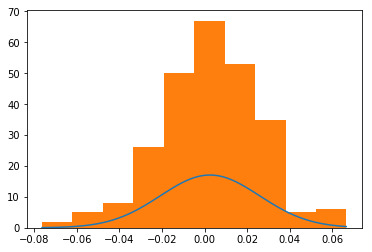

In [10]:
#讓我們畫畫圖吧
import scipy.stats as stats
import numpy as np

h = sorted(c_return_list)
x_axis = np.arange(h[0],h[-1], 0.0001)
plt.plot(x_axis,stats.norm.pdf(x_axis,mu,math.sqrt(sigma_2)))
plt.hist(h)
plt.show()

In [11]:
#來估計週報酬小於-0.04的機率吧
print(stats.norm(mu, math.sqrt(sigma_2)).cdf(-0.04))
#大於0.06的機率
print(1 - stats.norm(mu, math.sqrt(sigma_2)).cdf(0.06))

0.03424529537560574
0.006985305396849162
